# **Case Study Project 03 - Group H**
| NIM | Nama |
| -------- | -------- |
|11220940000001   | Baharuddin Saefullah Asyubanji   |
|11220940000002   | Deswita Nur Ardias Farsha |
|11220940000020  | Muhammad Abdul Ghofur |
|11220940000031   | Ahmad Fauzan      |
|11220940000052   | Tsabita Salma    |

# **Install dan Import Library yang Diperlukan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
plt.style.use('bmh'); sns.set()
"Done"

'Done'

In [ ]:
# fungsi sederhana untuk melakukan cross validation dengan membagi train dan test
def cross(modelku, X, y, n = 10):
  kf = KFold(n_splits=n, shuffle=True, random_state=42)
  acc_scores = []
  accmax = 0
  best_model = None
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt = modelku.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
    if accmax < acc:
      accmax = acc
      best_model = dt

  return acc_scores, best_model


# **Import Data**

**Data Understanding**

- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.

- primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions

- square_feet - Gross floor area of the building

- year_built - Year building was opened

- floor_count - Number of floors of the building

- air_temperature - Degrees Celsius

- cloud_coverage - Portion of the sky covered in clouds, in oktas

- dew_temperature - Degrees Celsius

- precip_depth_1_hr - Millimeters

- sea_level_pressure - Millibar/hectopascals

- wind_direction - Compass direction (0-360)

- wind_speed - Meters per second

Beberapa variabel dan observasi dari data asal hilang karena tidak lagi relevant setelah proses wrangling.

Baca lebih lanjut disini: https://www.kaggle.com/competitions/ashrae-energy-prediction/overview


In [ ]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.sample(10)

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 14:01:33--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.04s   

2024-11-24 14:01:33 (6.29 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
57,363.328063,Lodging/residential,65359,2013.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1324,94.912969,Office,42755,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
218,56.824410,Public services,16411,NaN,NaN,24.963702,2.083712,3.901814,0.155325,1011.436563,153.629430,2.899795
920,230.992675,Education,216050,NaN,NaN,21.325261,0.592396,13.848085,0.775686,1016.404579,123.388701,2.157103
1160,287.253424,Entertainment/public assembly,166856,NaN,NaN,9.115628,2.778787,2.836979,0.808871,1016.426988,187.301104,4.112377
1142,679.565093,Office,249457,NaN,NaN,9.115628,2.778787,2.836979,0.808871,1016.426988,187.301104,4.112377
1052,8.866822,Office,12152,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
174,168.127907,Education,90900,NaN,NaN,24.963702,2.083712,3.901814,0.155325,1011.436563,153.629430,2.899795
133,55.862967,Lodging/residential,64723,1960.0,8.0,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
819,13.959655,Warehouse/storage,15120,NaN,1.0,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# **Preprocessing Umum**

## **Melihat Data**

### Cek Nama Variiabel

In [ ]:
# Cek kolom
df.columns

Index(['meter_reading', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

### Memerikasa Ukuran dan Tipe Data

#### Cek Tipe Variabel dan Ukuan Data

In [ ]:
df.info()
baris, kolom = df.shape
print(f"\n{baris} Baris dan {kolom} Kolom")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB

1413 Baris dan 12 Kolom


Tidak ada variabel yang perlu diubah karena tipe variabel telah sesuai

Dari info yang diberikan, dataset `Ashrae_Energy_Mean.csv` ini memiliki <font color="blue">1413</font> baris dan <font color="blue">12</font> kolom dengan tipe data nya adalah <font color="blue">object, integer (int64), dan float. (float 64)</font>

#### Memeriksa variabel kategorik primary_use


In [ ]:
# Lihat kategori
df['primary_use'].value_counts()

,count
primary_use,
Education,537
Office,269
Entertainment/public assembly,179
Public services,155
Lodging/residential,145
Other,25
Parking,22
Healthcare,21
Warehouse/storage,12


In [ ]:
# Definisikan pengelompokan kategori
mapping = {
    'Education': 'Education',
    'Technology/science': 'Education',
    'Lodging/residential': 'Residential',
    'Office': 'Office',
    'Entertainment/public assembly': 'Public assembly',
    'Public services': 'Public services',
    'Services': 'Public services',
    'Food sales and service': 'Public services',
    'Healthcare': 'Public services',
    'Retail': 'Others',
    'Parking': 'Others',
    'Warehouse/storage': 'Others',
    'Utility': 'Others',
    'Religious worship': 'Others',
    'Manufacturing/industrial': 'Others',
    'Other': 'Others',
}

# Terapkan mapping ke kolom primary_use
df['primary_use'] = df['primary_use'].replace(mapping)

# Lihat kategori baru
print(df['primary_use'].value_counts())


primary_use
Education          543
Office             269
Public services    190
Public assembly    179
Residential        145
Others              87
Name: count, dtype: int64


## **Duplikasi Data**

### Mengecek Duplikasi Pada Data

In [ ]:
#mengecek apakah ada duplikat data?
print(df.shape)
df.duplicated().sum()

(1413, 12)


0

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Menghitung jumlah baris duplikat pada kolom 'cloud_coverage'
duplicate_count = df.duplicated(subset=['cloud_coverage'], keep=False).sum()
print(f"Jumlah baris duplikat pada 'cloud_coverage': {duplicate_count}")

Jumlah baris duplikat pada 'cloud_coverage': 1413


Tidak terdapat duplikasi pada data

## **Missing Value**

### Periksa Missing Value

#### Tampilkan Missing Value Dengan HeatMap

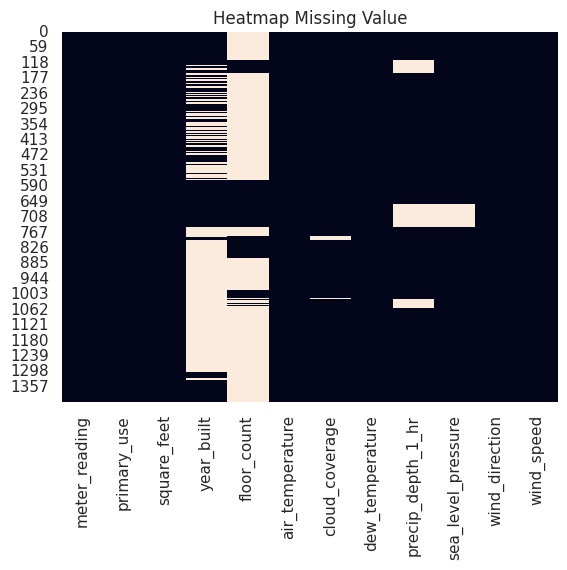

In [ ]:
# Visualisasi Missing Value
# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

#### Hitung Nilai Missing Dari Data

In [ ]:
# prompt: menghitung null pada stiap kolom
# Menghitung jumlah nilai null pada setiap kolom
null_counts = df.isnull().sum()

# Menampilkan hasil
print("Jumlah nilai null pada setiap kolom:")
null_counts

Jumlah nilai null pada setiap kolom:


,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


#### Presentase Missing Value

In [ ]:
# Menghitung persentase missing values
missing_percentage = df.isnull().sum() / len(df) * 100

# Menampilkan hasil
print("Persentase Missing Values per Kolom:")
print(missing_percentage)

Persentase Missing Values per Kolom:
meter_reading          0.000000
primary_use            0.000000
square_feet            0.000000
year_built            53.078556
floor_count           75.088464
air_temperature        0.000000
cloud_coverage         1.203114
dew_temperature        0.000000
precip_depth_1_hr     12.455768
sea_level_pressure     6.298655
wind_direction         0.000000
wind_speed             0.000000
dtype: float64


<Axes: >

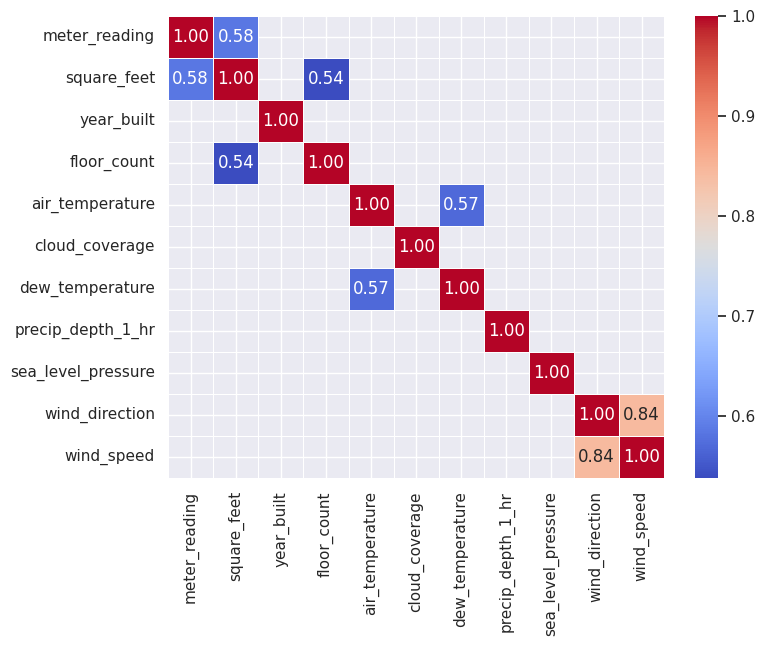

In [ ]:
# Calculate the correlation matrix only for numeric columns.
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Filter for correlations greater than 0.5
filtered_correlation_matrix = correlation_matrix[correlation_matrix > 0.5]

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Dapat diperhatikan bahwa variabel-variabel (year_built, floor_count, cloud_coverage, precip_depth_1_hr, sea_level_pressure) yang mengandung MV memiliki tidak memiliki korelasi kuat dengan variabel lain yang ada. oleh karena itu kami hanya melakukan imputasi atau membuang kolom untuk penanganannya.

- pada year_built dan floor_count, memiliki MV lebih dari 50% sehingga sangat mempengaruhi data, maka variabel dihapus.

### Penanganan Missing Value

#### Menghapus Variabel Dengan Jumlah Presentase Missing Value Di Atas 50%

In [ ]:
# Hapus variabel
df2 = df.drop(columns=['year_built', 'floor_count'], errors='ignore')
df2

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


#### Penanganan Missing Value pada cloud_coverage

In [ ]:
# Menghitung frekuensi setiap nilai pada kolom 'cloud_coverage'
value_counts = df2['cloud_coverage'].value_counts()
print(value_counts)

cloud_coverage
4.079235    274
2.998727    175
2.778787    141
2.083712    135
0.592396    122
1.092101    114
0.665832    102
1.844576     91
0.388354     89
0.059266     51
0.681089     36
5.671785     36
0.338958     30
Name: count, dtype: int64


In [ ]:
# Menampilkan semua baris dengan NaN pada cloud_coverage
nan_rows = df2[df2['cloud_coverage'].isnull()]

# Menampilkan keunikan baris
print("Baris dengan NaN di cloud_coverage:")
for i in nan_rows.drop(columns=['meter_reading','primary_use', 'square_feet']).columns:
  print('\n',i)
  print(nan_rows[i].unique())
# tidak pakai meter_reading, square feet karena data terlalu beragam
# tidak pakai primary use karena data kategori

Baris dengan NaN di cloud_coverage:

 air_temperature
[7.57213642]

 cloud_coverage
[nan]

 dew_temperature
[2.03795245]

 precip_depth_1_hr
[11.67563291]

 sea_level_pressure
[1015.59679357]

 wind_direction
[206.99503712]

 wind_speed
[3.39068964]


data pada kolom air_temperature, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed nilai yang monoton, akan dicek apakah ada nilai cloud coverage berdasartkan data variebel tersebut.


In [ ]:
print(df2[df2['air_temperature']== 7.572136]['cloud_coverage'].unique())
print(df2[df2['dew_temperature']== 2.03795245]['cloud_coverage'].unique())
print(df2[df2['precip_depth_1_hr']== 11.67563291]['cloud_coverage'].unique())
print(df2[df2['sea_level_pressure']== 1015.59679357]['cloud_coverage'].unique())
print(df2[df2['wind_direction']== 206.99503712]['cloud_coverage'].unique())
print(df2[df2['wind_speed']== 3.39068964]['cloud_coverage'].unique())

[]
[]
[]
[]
[]
[]


kosong semua, maka dari itu imputasi berdasarkan mean.

##### Inputasi Missing Value dengan Mean

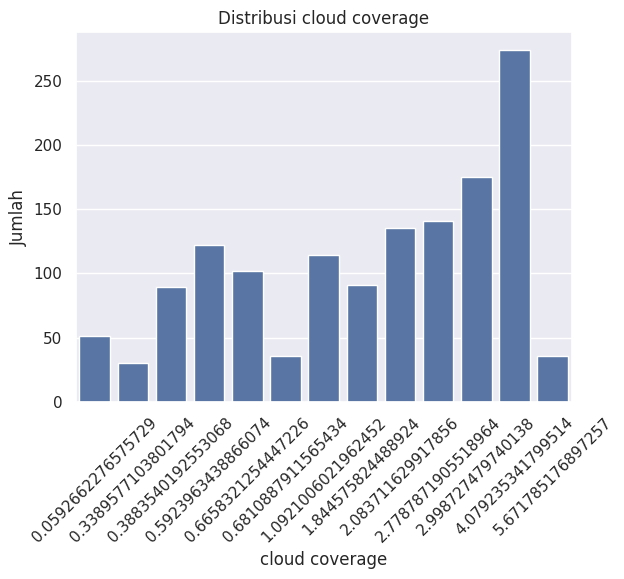

In [ ]:
sns.countplot(data=df2, x='cloud_coverage')
plt.xticks(rotation=45)
plt.title('Distribusi cloud coverage')
plt.xlabel('cloud coverage')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Cek jumlah nilai hilang
print("Sebelum imputasi:")
print(df2['cloud_coverage'].isnull().sum())

# Hitung mean
mean_value = df2['cloud_coverage'].mean()
print(f"Mean cloud_coverage: {mean_value}")

# Imputasi nilai hilang dengan mean
df2['cloud_coverage'] = df2['cloud_coverage'].fillna(mean_value)

# Verifikasi hasil
print("Setelah imputasi:")
print(df2['cloud_coverage'].isnull().sum())

Sebelum imputasi:
17
Mean cloud_coverage: 2.1666183634873293
Setelah imputasi:
0


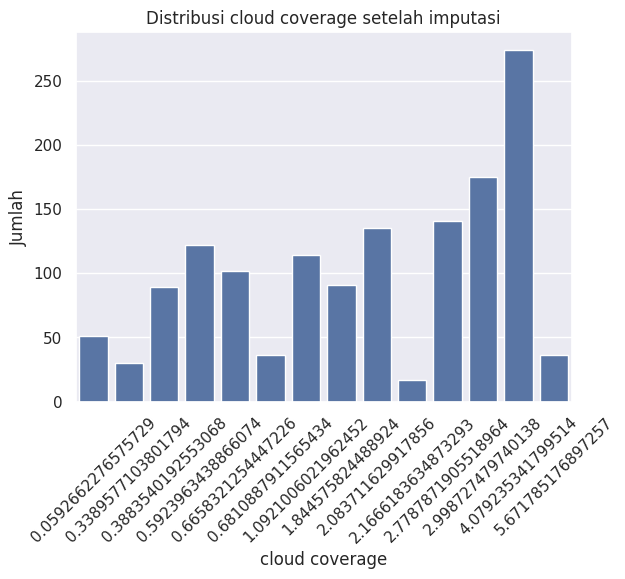

In [ ]:
sns.countplot(data=df2, x='cloud_coverage')
plt.xticks(rotation=45)
plt.title('Distribusi cloud coverage setelah imputasi')
plt.xlabel('cloud coverage')
plt.ylabel('Jumlah')
plt.show()

#### Penanganan Missing Value pada precip_depth_1_hr

In [ ]:
# Menghitung frekuensi setiap nilai pada kolom 'precip_depth_1_hr'
value_counts = df2['precip_depth_1_hr'].value_counts()
print(value_counts)

precip_depth_1_hr
0.895980     274
1.240589     175
0.808871     141
0.155325     135
0.775686     122
3.381837     114
1.033215     102
0.440202      91
1.029495      36
0.353491      30
11.675633     17
Name: count, dtype: int64


kosong semua, maka dari itu imputasi berdasarkan mean.

In [ ]:
# Menampilkan semua baris dengan NaN pada precip_depth_1_hr
nan_rows = df2[df2['precip_depth_1_hr'].isnull()]

# Menampilkan keunikan baris
print("Baris dengan NaN di precip_depth_1_hr:")
for i in nan_rows.drop(columns=['meter_reading','primary_use', 'square_feet']).columns:
  print('\n',i)
  print(nan_rows[i].unique())
# tidak pakai meter_reading, square feet karena data terlalu beragam
# tidak pakai primary use karena data kategori

Baris dengan NaN di precip_depth_1_hr:

 air_temperature
[12.01550697 11.05862891  9.95909196]

 cloud_coverage
[0.05926623 0.38835402 5.67178518]

 dew_temperature
[7.57810735 8.35309506 6.69340862]

 precip_depth_1_hr
[nan]

 sea_level_pressure
[1015.75713184           nan 1014.01735327]

 wind_direction
[197.76937255 206.60613526 207.13407607]

 wind_speed
[4.01377735 4.84647199 5.4939387 ]


data pada kolom air_temperature, dew_temperature, cloud_coverage, sea_level_pressure, wind_direction, wind_speed nilai yang monoton, akan dicek apakah ada nilai precip_depth_1_hr berdasartkan data variebel tersebut.


In [ ]:
print(df2[df2['air_temperature'].isin([12.01550697, 11.05862891,  9.95909196])]['precip_depth_1_hr'].unique())
print(df2[df2['dew_temperature'].isin([7.57810735, 8.35309506, 6.69340862])]['precip_depth_1_hr'].unique())
print(df2[df2['cloud_coverage'].isin([0.05926623, 0.38835402, 5.67178518])]['precip_depth_1_hr'].unique())
print(df2[df2['sea_level_pressure'].isin([1015.75713184,np.nan,1014.01735327])]['precip_depth_1_hr'].unique())
print(df2[df2['wind_direction'].isin([197.76937255, 206.60613526, 207.13407607])]['precip_depth_1_hr'].unique())
print(df2[df2['wind_speed'].isin([4.01377735,  4.84647199,  5.4939387 ])]['precip_depth_1_hr'].unique())

[]
[]
[]
[nan]
[]
[]


kosong semua, maka dari itu imputasi berdasarkan mean.

##### Inputasi Nilai Missing dengan Mean

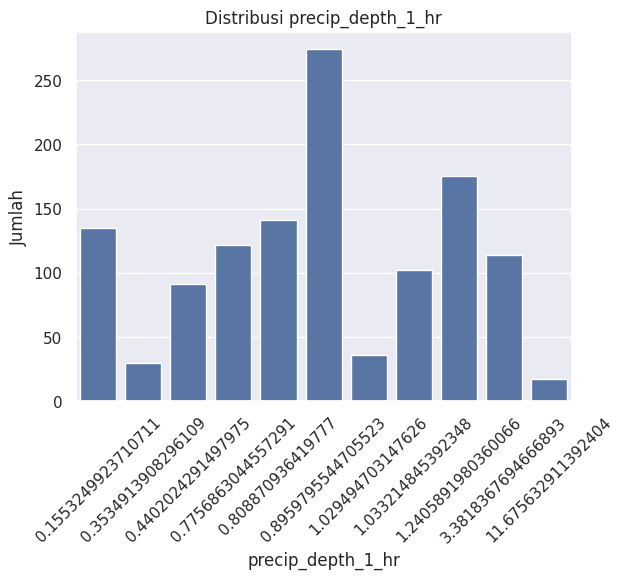

In [ ]:
sns.countplot(data=df2, x='precip_depth_1_hr')
plt.xticks(rotation=45)
plt.title('Distribusi precip_depth_1_hr')
plt.xlabel('precip_depth_1_hr')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Mengisi missing values dengan Mean
global_mean = df2['precip_depth_1_hr'].mean()  # Rata-rata global
df2['precip_depth_1_hr'] = df2['precip_depth_1_hr'].fillna(global_mean)

# Mengecek jumlah missing values setelah imputasi
print(f"Jumlah missing values pada precip_depth_1_hr setelah imputasi: {df2['precip_depth_1_hr'].isnull().sum()}")

Jumlah missing values pada precip_depth_1_hr setelah imputasi: 0


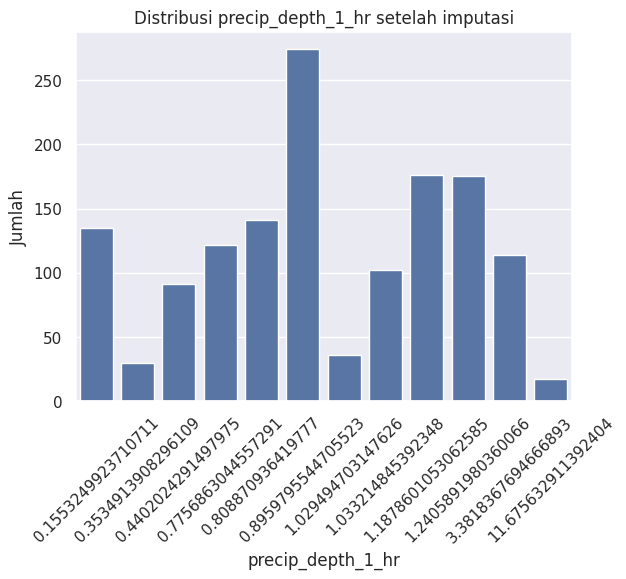

In [ ]:
sns.countplot(data=df2, x='precip_depth_1_hr')
plt.xticks(rotation=45)
plt.title('Distribusi precip_depth_1_hr setelah imputasi')
plt.xlabel('precip_depth_1_hr')
plt.ylabel('Jumlah')
plt.show()

#### Penanganan Missing Value pada sea_level_pressure

##### Melihat Nilai Missing pada Variabel sea_level_pressure

In [ ]:
# Menghitung frekuensi setiap nilai pada kolom 'sea_level_pressure'
value_counts = df2['sea_level_pressure'].value_counts()
print(value_counts)

sea_level_pressure
1018.052063    274
1017.949437    175
1016.426988    141
1011.436563    135
1016.404579    122
1017.192111    114
1016.608501    102
1016.797495     91
1015.757132     51
1017.561461     36
1014.017353     36
1015.508073     30
1015.596794     17
Name: count, dtype: int64


kosong semua, maka dari itu imputasi berdasarkan mean.

In [ ]:
# Menampilkan semua baris dengan NaN pada sea_level_pressure
nan_rows = df2[df2['sea_level_pressure'].isnull()]

# Menampilkan keunikan baris
print("Baris dengan NaN di sea_level_pressure:")
for i in nan_rows.drop(columns=['meter_reading','primary_use', 'square_feet']).columns:
  print('\n',i)
  print(nan_rows[i].unique())
# tidak pakai meter_reading, square feet karena data terlalu beragam
# tidak pakai primary use karena data kategori

Baris dengan NaN di sea_level_pressure:

 air_temperature
[11.05862891]

 cloud_coverage
[0.38835402]

 dew_temperature
[8.35309506]

 precip_depth_1_hr
[1.18786011]

 sea_level_pressure
[nan]

 wind_direction
[206.60613526]

 wind_speed
[4.84647199]


data pada kolom air_temperature, dew_temperature, cloud_coverage, precip_depth_1_hr, wind_direction, wind_speed nilai yang monoton, akan dicek apakah ada nilai sea_level_pressure berdasartkan data variebel tersebut.


In [ ]:
print(df2[df2['air_temperature']== 11.05862891]['sea_level_pressure'].unique())
print(df2[df2['dew_temperature']== 8.35309506]['sea_level_pressure'].unique())
print(df2[df2['precip_depth_1_hr']== 1.18786011]['sea_level_pressure'].unique())
print(df2[df2['cloud_coverage']== 0.38835402]['sea_level_pressure'].unique())
print(df2[df2['wind_direction']== 206.60613526]['sea_level_pressure'].unique())
print(df2[df2['wind_speed']== 4.84647199]['sea_level_pressure'].unique())

[]
[]
[]
[]
[]
[]


kosong semua, maka dari itu imputasi berdasarkan mean.

##### Inputasi Nilai Missing dengan Mean

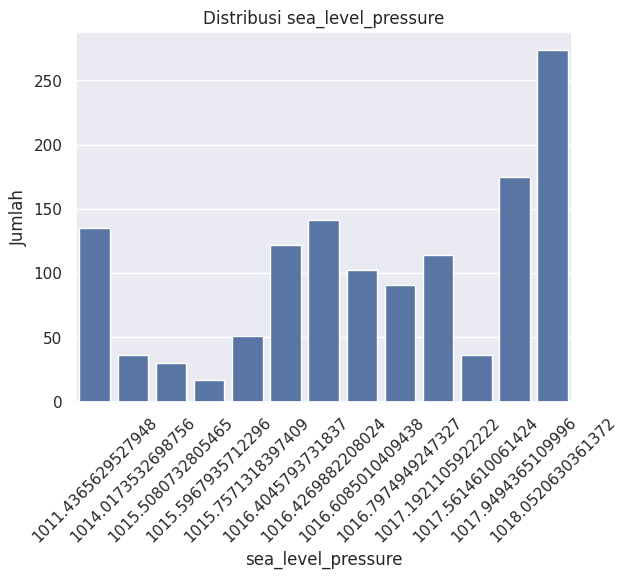

In [ ]:
sns.countplot(data=df2, x='sea_level_pressure')
plt.xticks(rotation=45)
plt.title('Distribusi sea_level_pressure')
plt.xlabel('sea_level_pressure')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# imputasi dengan mean
global_mean = df2['sea_level_pressure'].mean()
df2['sea_level_pressure'] = df2['sea_level_pressure'].fillna(global_mean)

# Memeriksa hasil akhir
final_missing = df2['sea_level_pressure'].isnull().sum()
print(f"Jumlah missing values pada sea_level_pressure setelah imputasi lengkap: {final_missing}")

Jumlah missing values pada sea_level_pressure setelah imputasi lengkap: 0


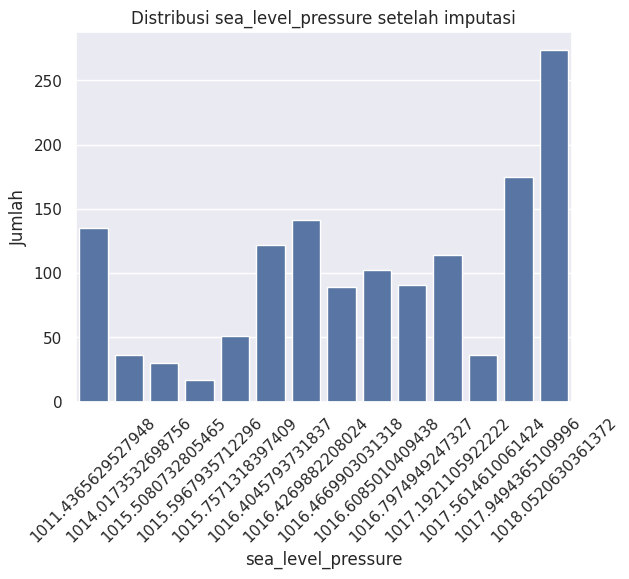

In [ ]:
sns.countplot(data=df2, x='sea_level_pressure')
plt.xticks(rotation=45)
plt.title('Distribusi sea_level_pressure setelah imputasi')
plt.xlabel('sea_level_pressure')
plt.ylabel('Jumlah')
plt.show()

#### Periksa Kembali Presentase Missing Value

In [ ]:
(df2.isnull().sum()/len(df2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
meter_reading,0.0
primary_use,0.0
square_feet,0.0
air_temperature,0.0
cloud_coverage,0.0
dew_temperature,0.0
precip_depth_1_hr,0.0
sea_level_pressure,0.0
wind_direction,0.0
wind_speed,0.0


Dapat dilihat sudah tidak ada lagi nilai missing pada data

## **Noise**

### Mengecek Noise Pada Data

#### Menampilkan Nilai Unik Pada Kolom Variabel

In [ ]:
# Cek Noise
df2.nunique()

,0
meter_reading,1413
primary_use,6
square_feet,1362
air_temperature,14
cloud_coverage,14
dew_temperature,14
precip_depth_1_hr,12
sea_level_pressure,14
wind_direction,14
wind_speed,14


Pemeriksaan noise kita lakukan dengan melihat statistika deskriptif, apakah ada persebarana data yang diluar jangkauan data seharusnya.

Karena pada variabel primary_use, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed memiliki variasi keunikan yang sedikit, kita juga dapat memeriksa noise dengan value_counts.


In [ ]:
df2.describe(include = 'all')

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,NaN,111412.340117,5.416736,1.452818,4.625295,1.383447,1.860415,24.921236,0.737746
min,0.000400,NaN,283.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,15.204244,2.083712,8.285693,0.895980,1016.608501,184.295922,3.619547
75%,182.884848,NaN,115288.000000,21.325261,2.998727,9.834399,1.187860,1017.949437,187.301104,3.905433


In [ ]:
# Fungsi untuk menghitung nilai unik pada setiap variabel
from collections import Counter
def count_all_values(df2):
    result = {}

    for column in df2.columns:
        value_counts = Counter(df2[column])
        result[column] = value_counts

    return result

In [ ]:
# Menghitung nilai unik pada setiap variabel
count_all_values(df2.drop(columns = ['meter_reading', 'square_feet']))

{'primary_use': Counter({'Education': 543,
          'Residential': 145,
          'Office': 269,
          'Public assembly': 179,
          'Others': 87,
          'Public services': 190}),
 'air_temperature': Counter({22.744815786472: 175,
          12.01550697352749: 51,
          24.963702380047145: 135,
          15.502517971929558: 274,
          14.725362181071525: 91,
          11.058628914364853: 89,
          15.204244062119368: 36,
          7.57213641958153: 17,
          21.32526143042516: 122,
          11.704354457408678: 30,
          9.959091956672044: 36,
          9.11562797064527: 141,
          13.109653860783569: 102,
          9.079138233573795: 114}),
 'cloud_coverage': Counter({2.998727479740138: 175,
          0.0592662276575729: 51,
          2.083711629917856: 135,
          4.079235341799514: 274,
          1.844575824488924: 91,
          0.3883540192553068: 89,
          0.6810887911565434: 36,
          2.1666183634873293: 17,
          0.59239634388660

Tidak ditemukan noise.


# **Pemodelan, Interpretasi, dan Insight**

## Percobaan Model Regresi

In [ ]:
# fungsi untuk memisahkan outlier, maksimal pembuangan outlier 15%
def no_outlier(df, column, dfnew2, n):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    dfnew=df[no]
    dfnew3=df[~no]
    dfnew2=pd.concat([dfnew2,dfnew3])
    if (len(dfnew3)>0) and (len(dfnew2)< 0.15*n):
      return no_outlier(dfnew, column, dfnew2, n)
    else:
      return dfnew, dfnew2

dfnew, dfnewo = no_outlier(df2, 'meter_reading', pd.DataFrame(columns=df2.columns), len(df2))
dfnew.shape

(1188, 10)

In [ ]:
# fungsi untuk mencari model terbaik
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
# model regresi terbaik
model = forward_selected(dfnew, 'meter_reading')
print(model.model.formula)
print(model.rsquared)

meter_reading ~ square_feet + primary_use + precip_depth_1_hr + wind_direction + cloud_coverage + wind_speed + 1
0.3216979810537659


Karena sudah jelas luas suatu bangunan akan mempengaruhi konsumsi energi, maka kami mencoba pendekatan lain tanpa variable square_feet.

In [ ]:
# model regresi terbaik
model2 = forward_selected(dfnew.drop(columns=['square_feet']), 'meter_reading')
print(model2.model.formula)
print(model2.rsquared)

meter_reading ~ primary_use + wind_speed + precip_depth_1_hr + cloud_coverage + dew_temperature + air_temperature + sea_level_pressure + 1
0.08670509119662306


Diperoleh Nilai Rsquare yang sangat kecil, ini menandakan variabel prediktor tidak cukup mewakili variasi dari varibel target yakni konsumsi energi. Maka kami mencoba pendekatan lain dengan model yang menggunakan variabel target kategorik. Kami membagi dua jenis meter_reading menjadi 'False' untuk konsumsi energi rendah (di bawah 100) dan 'True' untuk konsumsi energi tinggi (di atas 100).

## Mempersiapkan Data Untuk Model Lain

In [ ]:
# Menentukan kategori berdasarkan nilai meter_reading untuk penggunaan dalam model
df2['category_meter'] = pd.cut(df2['meter_reading'], bins=[0, 100, df2['meter_reading'].max()],
                        labels=[False,True]) # False = nilai meter_reading < 100, True = meter_reading > 100

# Melihat beberapa hasil
print(df2[['meter_reading', 'category_meter']].head())
df2['category_meter'].value_counts()

   meter_reading category_meter
0     237.749127           True
1     118.553743           True
2      23.626500          False
3     382.736016           True
4    1579.174237           True


,count
category_meter,
False,822
True,591


In [ ]:
# membuang variabel meter_reading karena sudah menggunakan category_meter
dfcat = df2.drop(columns=['meter_reading'])

In [ ]:
# melakukan encode untuk data kategori di primary use agar dapat digunakan dalam model
df_encoded2 = pd.get_dummies(dfcat, columns=['primary_use'])
df_encoded2.columns = df_encoded2.columns.str.replace('/', '_')
df_encoded2.columns

Index(['square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'category_meter', 'primary_use_Education',
       'primary_use_Office', 'primary_use_Others',
       'primary_use_Public assembly', 'primary_use_Public services',
       'primary_use_Residential'],
      dtype='object')

## Pemodelan Data

Akan dilakukan pemodelan dengan descision tree.
Lalu telah dilakukan grid search ('coba-coba') untuk model tersebut, dan diperoleh model akurasi terbaik dengan variabel prediktor berikut:
- 'square_feet',
- 'cloud_coverage',
- 'air_temperature',
- 'wind_speed',
- 'primary_use_Education'


### Model 1: Descision tree dengan variabel 'square_feet'
beserta interpretasi dan insight

In [ ]:
# memisahkan data menjadi data train dan data test untuk hasil evaluasi akhir
X1 = df_encoded2[['square_feet', 'cloud_coverage', 'air_temperature', 'wind_speed', 'primary_use_Education']]
Y1 = df_encoded2['category_meter']

X1_train, X1_testlast, y1_train, y1_testlast = train_test_split(X1, Y1, test_size=0.1, random_state=99)

In [ ]:
# Build the model and Evaluate
dt_model1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
# crossval mencari memeriksa akurasi dan mencari model terbaik
accscore1, best_model1 = cross(dt_model1,X1_train, y1_train, 11)
print('Accuracy descision tree dengan:', np.mean(accscore1))

Accuracy descision tree dengan: 0.8088387624369632


Hasil yang didapatkan dari cross-validation model 1 Decision Tree menunjukkan akurasi rata-rata sekitar 80.88% berdasarkan 10-fold cross-validation. Ini berarti bahwa jika model dilatih pada 11 subset berbeda dari data, model secara keseluruhan memiliki performa dengan akurasi sekitar 80.88%

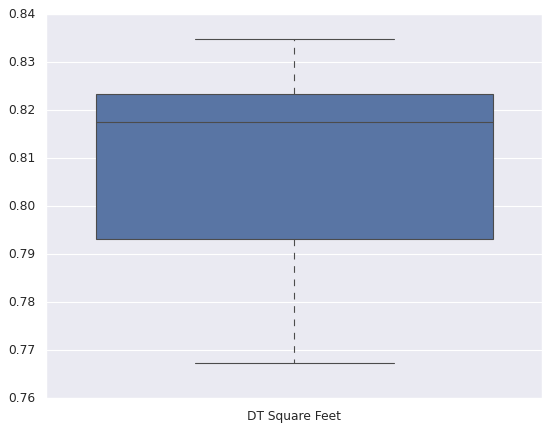

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'DT Square Feet':accscore1})
sns.boxplot(data=df)
plt.show()

Boxplot ini menunjukkan distribusi akurasi model Regresi Logistik dari cross-validation, dengan Median akurasi berada di sekitar 0.82, menunjukkan performa rata-rata model yang cukup konsisten. Rentang akurasi berkisar antara 0.77 hingga 0.83, menunjukkan performa yang stabil meskipun ada sedikit variasi pada subset data tertentu. Secara keseluruhan, model ini menunjukkan kinerja yang baik dengan akurasi maksimum mencapai 83%.

In [ ]:
# hasil dengan model terbaik
dt_prediction = best_model1.predict(X1_testlast)
print('Akurasi = ', accuracy_score(y1_testlast, dt_prediction))
print(classification_report(y1_testlast, dt_prediction))
# low = 0, high = 1

Akurasi =  0.8450704225352113
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        88
         1.0       0.81      0.78      0.79        54

    accuracy                           0.85       142
   macro avg       0.84      0.83      0.83       142
weighted avg       0.84      0.85      0.84       142



Model secara keseluruhan dapat memprediksi dengan benar sekitar 84,5% dari total data testing.


**Precission, recall,  f1-score, dan support**
1. Precission
  *   Precision Low: 87% → Dari semua yang diprediksi kelas Low, 87% benar.
  *   Precision High: 81% → Dari semua yang diprediksi kelas High, 81% benar.

2. Recall

  *   Recall Low: 89% → Dari semua sampel kelas Low, model berhasil memprediksi dengan benar sebanyak 89%.
  *   Recall High: 78% → Dari semua sampel kelas High, model berhasil memprediksi dengan benar sebanyak 78%.

3. F1-score

  *   Recall Low: 88%
  *   Recall High: 79%
      
  Performa model bekerja lebih baik pada kelas Low, dan juga cukup baik pada kelas High.

4. Support

  *   Support Low: 88 → Ini berarti ada 88 sampel yang berasal dari kelas low di data train.
  *   Support High: 54 → Ini berarti ada 54 sampel yang berasal dari kelas high di data train.

  Dengan support yang lebih besar untuk kelas Low dibandingkan kelas High, model memiliki ketidakseimbangan kelas. Sehingga model akan cenderung lebih akurat dalam memprediksi kelas Low.

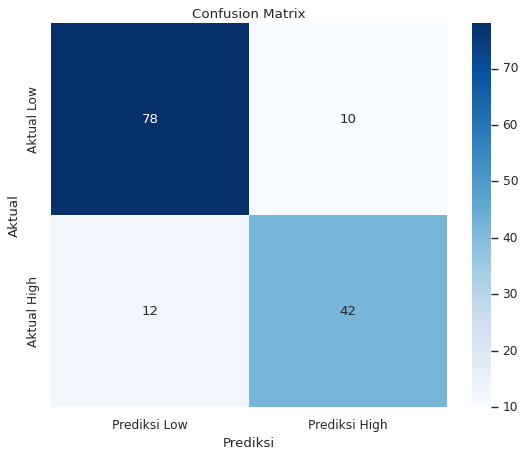

In [ ]:
cm=confusion_matrix(y1_testlast, dt_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Low', 'Prediksi High'], yticklabels=['Aktual Low', 'Aktual High'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

**Confussion Matrix**
1. Kelas Low

  *   True Negatives (TN): Model berhasil memprediksi dengan benar 78 data adalah kelas Low.
  *   False Positives (FP): model salah memprediksi 10 data dari kelas Low sebagai High.
    

2. Kelas High

  *  False Negatives (FN): model salah memprediksi 12 data dari kelas High sebagai Low.
  *   True Positives (TP):  Model berhasil memprediksi dengan benar 42 data adalah kelas High.

In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
importances = best_model1.feature_importances_
importances

array([0.81773622, 0.09013699, 0.07636271, 0.00561492, 0.01014917])

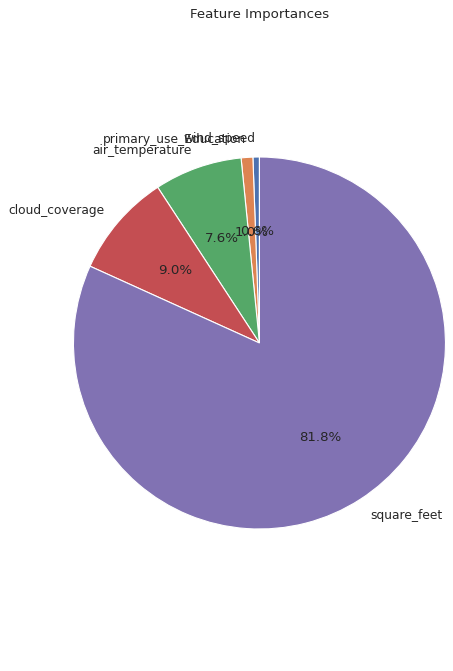

In [ ]:
features = X1.columns

# Mengurutkan fitur berdasarkan pentingnya
indices = importances.argsort()

# Plotting dengan Pie Chart
plt.figure(figsize=(6, 10))
plt.title("Feature Importances")

# Membuat pie chart
plt.pie(importances[indices], labels=features[indices], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Menjaga pie chart tetap bulat
plt.show()

**Kepentingan dari setiap variabel terhadap model**

1.   square_feet: 0.81773622 (81.77%)

      Luas lantai kotor bangunan memberikan pengaruh terbesar terhadap prediksi model. Hal ini menunjukkan bahwa ukuran bangunan sangat penting dalam menentukan konsumsi energi. Bangunan dengan ukuran besar cenderung memiliki konsumsi energi lebih tinggi. Sebagian besar keputusan model didorong oleh square_feet.

2.   cloud_coverage: 0.09013699 (9%)

      Cakupan awan memiliki pengaruh yang kecil terhadap prediksi model. Hal ini menunjukkan bahwa cakupan awan memiliki pengaruh terhadap rata-rata konsumsi energi. Awan mempengaruhi intensitas sinar matahari yang masuk ke dalam bangunan, yang pada akhirnya berdampak pada kebutuhan energi.

3.   air_temperature: 0.07636271 (7%)
      
      Suhu udara juga memiliki kontribusi yang kecil, hampir sebanding dengan variabel "cloud_coverage". Hal ini menunjukkan  bahwa meskipun suhu mempengaruhi konsumsi energi secara logika, dampaknya relatif kecil dibandingkan variabel sebelumnya.
      
      

4.   wind_speed: 0.00561492 (5%)

      Kecepatan angin memberikan pengaruh yang kecil juga terhadap prediksi model. Hal ini menunjukkan bahwa kecepatan angin memiliki pengaruh yang kecil terhadap rata-rata konsumsi energi.

5.   primary_use_education: 0.01014917 (1%)

      Aktivitas utama bangunan berdasarkan edukasi memiliki pengaruh terkecil dibandingkan semua variabel yang lain. Artinya bangunan untuk pendidikan (Education) memiliki pengaruh paling kecil terhadap rata-rata konsumsi energi.


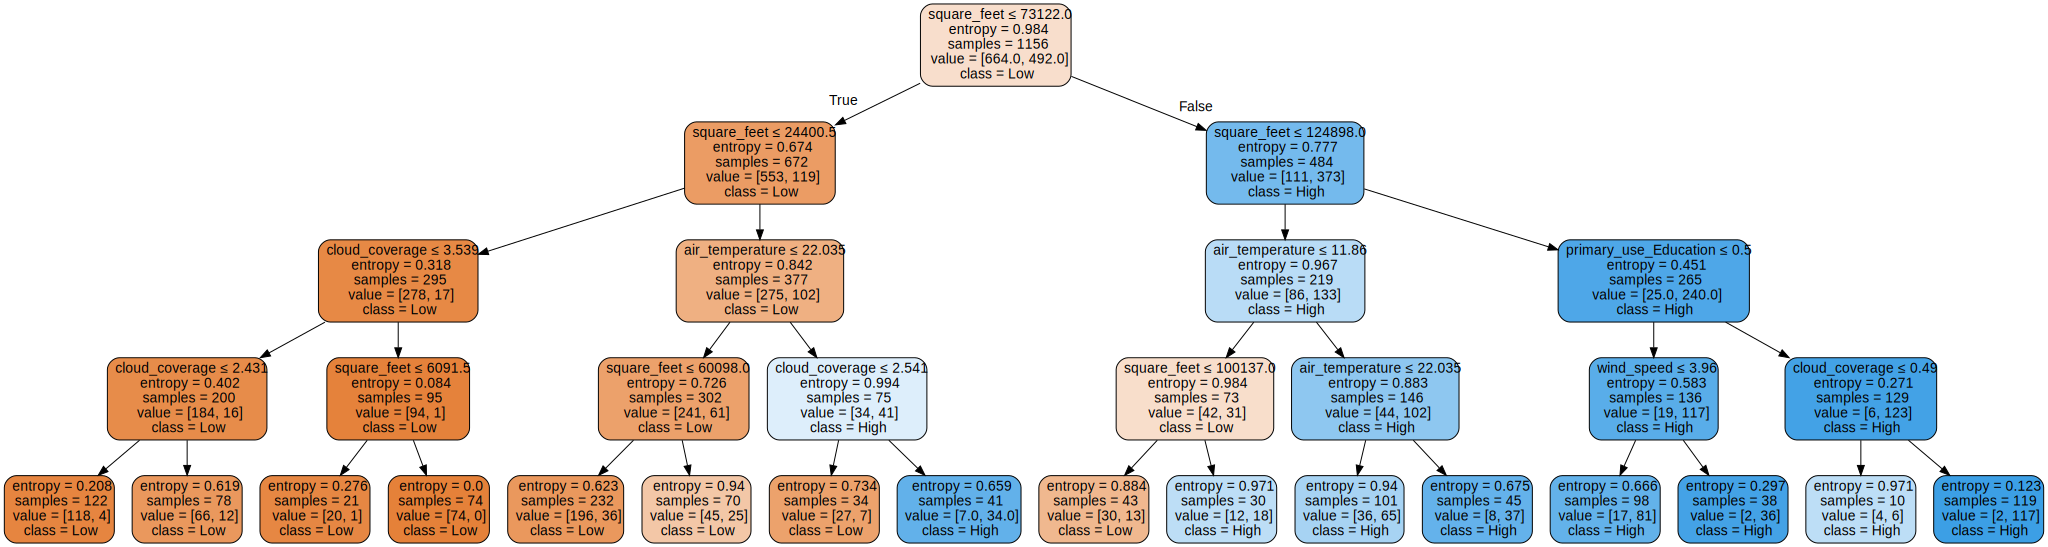

In [ ]:
import graphviz

dot_data = tree.export_graphviz(best_model1, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("squarefeet")
var_names = ['square_feet', 'cloud_coverage', 'air_temperature',
       'wind_speed', 'primary_use_Education']
categories = ['Low', 'High']
dot_data = tree.export_graphviz(best_model1, out_file=None,
                         feature_names = var_names,
                         class_names=categories,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


Decision tree di atas menunjukkan bahwa variabel square_feet memiliki pengaruh terbesar dalam menentukan klasifikasi antara kelas Low dan High.
*   Semakin kecil ukuran bangunan, semakin besar kemungkinan kategori meter reading adalah Low.
*   Semakin besar ukuran bangunan, semakin besar kemungkinan kategori meter reading adalah High.
*   Mayoritas variabel lainnya tidak mempengaruhi kelas Low dan High, artinya variabel-variabel tersebut tidak terlalu mempengaruhi model dalam menentukan kelas category_meter.

Kesimpulannya, model ini menunjukkan bahwa faktor luas lantai kotor bangunan sangat mempengaruhi konsumsi energi. Bangunan dengan luas lantai kotor yang kecil, membutuhkan lebih sedikit energi karena aktivitas yang tidak terlalu banyak. Sementara jika luas lantai kotor yang besar, kebutuhan energinya cenderung lebih tinggi. Sehingga konsumsi energi juga semakin tinggi.

Namun meskipun tanpa model ini, sudah jelas bahwa luas lantai kotor bangunan merupakan faktor terbesar terhadap besarnya suatu konsumsi energi. Oleh karena itu pada model kedua akan dilakukan pendekatan lain, yakni tanpa variabel square_feet.

### Model 2: Descision tree tanpa variabel 'square_feet'
beserta interpretasi dan insight

In [ ]:
# memisahkan data menjadi data train dan data test untuk hasil evaluasi akhir
X2 = df_encoded2[[ 'cloud_coverage', 'air_temperature', 'wind_speed', 'primary_use_Education']]
Y2 = df_encoded2['category_meter']

X2_train, X2_testlast, y2_train, y2_testlast = train_test_split(X2, Y2, test_size=0.1, random_state=99)

In [ ]:
# Build the model and Evaluate
dt_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
# crossval mencari memeriksa akurasi dan mencari model terbaik
accscore2, best_model2 = cross(dt_model2,X2_train, y2_train, 10)
print('Accuracy descision tree dengan:', np.mean(accscore2))

Accuracy descision tree dengan: 0.6183501476377952


Hasil yang didapatkan dari cross-validation model 2 Decision Tree menunjukkan akurasi rata-rata sekitar 61.83% berdasarkan 10-fold cross-validation. Ini berarti bahwa jika model dilatih pada 10 subset berbeda dari data, model secara keseluruhan memiliki performa dengan akurasi sekitar 61.83%

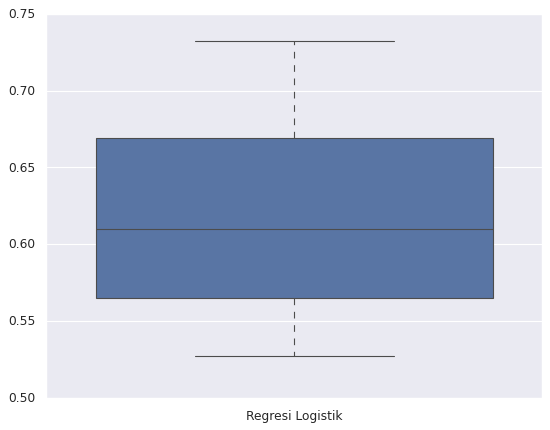

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Regresi Logistik':accscore2})
sns.boxplot(data=df)
plt.show()

Boxplot ini menunjukkan distribusi akurasi model Regresi Logistik dari cross-validation, dengan Median akurasi berada di sekitar 0.61, menunjukkan performa rata-rata model yang cukup konsisten. Rentang akurasi berkisar antara 0.52 hingga 0.73, menunjukkan performa yang stabil meskipun ada sedikit variasi pada subset data tertentu. Secara keseluruhan, model ini menunjukkan kinerja yang baik dengan akurasi maksimum mencapai 73%.

In [ ]:
# hasil dengan model terbaik
dt_prediction = best_model2.predict(X2_testlast)
print('Akurasi = ', accuracy_score(y2_testlast, dt_prediction))
print(classification_report(y2_testlast, dt_prediction))
# low = 0, high = 1

Akurasi =  0.6830985915492958
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77        88
         1.0       0.63      0.41      0.49        54

    accuracy                           0.68       142
   macro avg       0.66      0.63      0.63       142
weighted avg       0.67      0.68      0.66       142



Model secara keseluruhan dapat memprediksi dengan benar sekitar 68.31% dari total data testing.


**Precission, recall,  f1-score, dan support**
1. Precission
  *   Precision Low: 70% → Dari semua yang diprediksi kelas Low, 70% benar.
  *   Precision High: 63% → Dari semua yang diprediksi kelas High, 63% benar.

2. Recall

  *   Recall Low: 85% → Dari semua sampel kelas Low, model berhasil memprediksi dengan benar sebanyak 85%.
  *   Recall High: 41% → Dari semua sampel kelas High, model berhasil memprediksi dengan benar sebanyak 41%.

3. F1-score

  *   F1-score Low: 77%
  *   F1-score High: 49%
      
  Performa model cukup baik dalam memprediksi kelas Low, namun masih sulit memprediksi kelas High.

4. Support

  *   Support Low: 88 → Ini berarti ada 88 sampel yang berasal dari kelas low di data train.
  *   Support High: 54 → Ini berarti ada 54 sampel yang berasal dari kelas high di data train.

  Dengan support yang lebih besar untuk kelas Low dibandingkan kelas High, model memiliki ketidakseimbangan kelas. Sehingga model akan cenderung lebih akurat dalam memprediksi kelas Low.


    
    

  


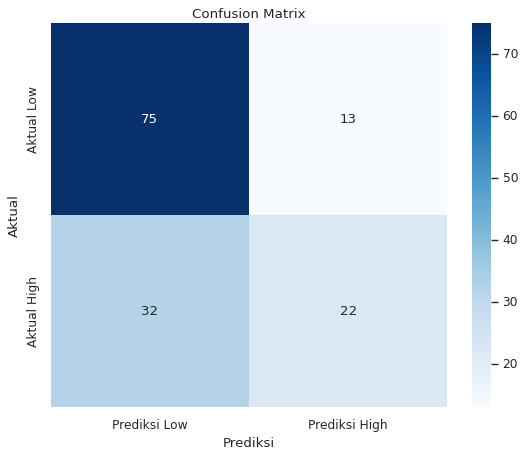

In [ ]:
cm2=confusion_matrix(y2_testlast, dt_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Low', 'Prediksi High'], yticklabels=['Aktual Low', 'Aktual High'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

**Confussion Matrix**
1. Kelas Low

  *   True Negatives (TN): Model berhasil memprediksi dengan benar 75 data adalah kelas Low.
  *   False Positives (FP): model salah memprediksi 13 data dari kelas Low sebagai High.
    

2. Kelas High

  *  False Negatives (FN): model salah memprediksi 32 data dari kelas High sebagai Low.
  *   True Positives (TP):  Model berhasil memprediksi dengan benar 22 data adalah kelas High.

In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
importances2 = best_model2.feature_importances_
importances2

array([0.27152265, 0.10698519, 0.35992921, 0.26156295])

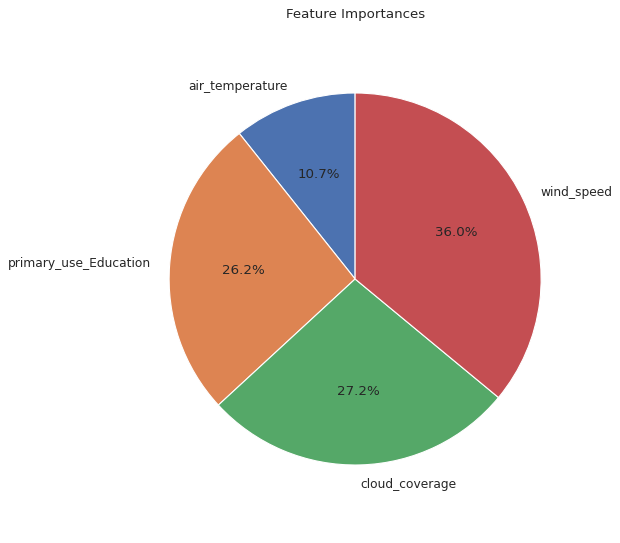

In [ ]:
features2 = X2.columns

# Mengurutkan fitur berdasarkan pentingnya
indices2 = importances2.argsort()

# Plotting dengan Pie Chart
plt.figure(figsize=(6, 8))
plt.title("Feature Importances")

# Membuat pie chart
plt.pie(importances2[indices2], labels=features2[indices2], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Menjaga pie chart tetap bulat
plt.show()

**Kepentingan dari setiap variabel terhadap model**

1.   wind_speed: 0.3599 (36%)

      Kecepatan angin memberikan pengaruh terbesar terhadap prediksi model. Hal ini menunjukkan bahwa kecepatan angin memiliki pengaruh terhadap rata-rata konsumsi energi. Faktor cuaca seperti angin kencang mempengaruhi kebutuhan energi, terutama untuk pemanasan atau pendinginan ruangan.

2.   cloud_coverage: 0.2715 (27.15%)

      Cakupan awan juga memiliki pengaruh terhadap prediksi model. Hal ini menunjukkan bahwa cakupan awan memiliki pengaruh terhadap rata-rata konsumsi energi. Awan mempengaruhi intensitas sinar matahari yang masuk ke dalam bangunan, yang pada akhirnya berdampak pada kebutuhan energi.

3.   primary_use_Education: 0.2616 (26.16%)
      
       Penggunaan bangunan juga memiliki kontribusi yang signifikan, hampir sebanding dengan variabel "cloud_coverage". Hal ini menunjukkan  bahwa apakah sebuah bangunan digunakan untuk pendidikan (Education) memiliki pengaruh terhadap rata-rata konsumsi energi. Bangunan seperti sekolah atau universitas menunjukkan pola konsumsi energi yang berbeda dibandingkan dengan penggunaan bangunan lainnya, karena ada aktivitas yang lebih intensif selama jam operasional.


4.   air_temperature: 0.107 (10.7%)

      Suhu udara memiliki pengaruh paling kecil di antara semua variabel, menunjukkan bahwa variabel ini kurang signifikan dibandingkan variabel lainnya. Suhu udara memiliki pengaruh paling kecil dibandingkan dengan faktor lainnya, menunjukkan bahwa meskipun suhu mempengaruhi konsumsi energi secara logika, dampaknya relatif kecil dibandingkan dengan tipe bangunan dan faktor cuaca.     


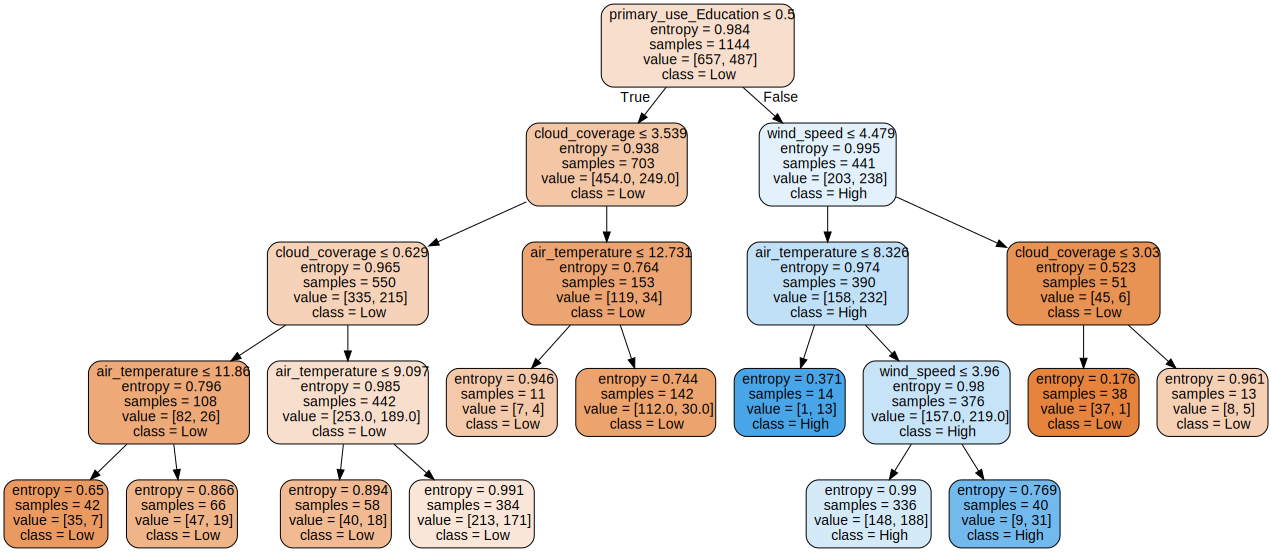

In [ ]:
import graphviz

dot_data = tree.export_graphviz(best_model2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("meter reading")
var_names = [ 'cloud_coverage', 'air_temperature',
       'wind_speed', 'primary_use_Education',]
categories = ['Low', 'High']
dot_data = tree.export_graphviz(best_model2, out_file=None,
                         feature_names = var_names,
                         class_names=categories,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


Decision tree di atas menunjukkan bahwa variabel-variabel seperti primary_use_Education dan wind_speed memiliki pengaruh besar dalam menentukan klasifikasi antara kelas Low dan High.



*   Mayoritas data dengan bangunan yang tidak digunakan untuk tujuan pendidikan digolongkan ke dalam kelas Low, terlepas dari faktor-faktor lain yang ada.
*  Jika bangunan digunakan untuk tujuan pendidikan dan kecepatan angin lebih dari 4.479, model lebih cenderung memprediksi kelas Low.
*   Jika bangunan digunakan untuk tujuan pendidikan dan  kecepatan angin kurang dari atau sama dengan 4.479, model lebih cenderung memprediksi kelas High.









Kesimpulannya, model ini menunjukkan bahwa faktor seperti penggunaan bangunan untuk pendidikan dan kecepatan angin sangat mempengaruhi konsumsi energi. Bangunan yang digunakan untuk pendidikan, terlepas dari faktor-faktor lain yang ada, membutuhkan lebih banyak energi karena aktivitas yang lebih padat. Sementara jika kecepatan angin tinggi, kebutuhan energi untuk pemanasan atau pendinginan cenderung lebih rendah. Sehingga konsumsi energi juga semakin rendah.

# **Kesimpulan Umum**

## Simpulan


Pada model 1, luas lantai terbukti memiliki pengaruh yang sangat besar terhadap prediksi konsumsi energi. Oleh karena itu, pada model 2, variabel luas lantai dihilangkan untuk mengeksplorasi pengaruh variabel lain terhadap kategori konsumsi energi tanpa dipengaruhi oleh luas lantai.

Hasilnya menunjukkan bahwa kecepatan angin, cakupan awan, penggunaan bangunan untuk pendidikan, dan suhu memiliki pengaruh terhadap konsumsi energi.

## Insight

Kecepatan angin sangat mempengaruhi kebutuhan energi, terutama untuk pemanasan atau pendinginan ruangan.
Cakupan awan juga berpengaruh, karena awan mengurangi intensitas sinar matahari yang masuk ke dalam bangunan, yang berdampak pada konsumsi energi.
Penggunaan bangunan untuk pendidikan memiliki kontribusi signifikan, dengan bangunan seperti sekolah atau universitas yang menunjukkan pola konsumsi energi yang lebih tinggi karena aktivitas yang lebih intensif.
Sementara itu, suhu udara memiliki pengaruh paling kecil, meskipun tetap mempengaruhi konsumsi energi, dampaknya relatif lebih kecil dibandingkan faktor lainnya.


## Rekomendasi

Berdasarkan insight yang didapat, berikut adalah rekomendasi pengelolaan energi yang dapat dilakukan:
Memanfaatkan Energi Terbarukan: Gunakan ventilasi alami atau turbin angin kecil untuk mendinginkan ruangan tanpa pendingin udara.
Atur Pencahayaan: Sesuaikan ukuran dan letak jendela untuk memaksimalkan sinar matahari dan gunakan pencahayaan buatan secara efisien saat cuaca mendung.
Efisiensi di Bangunan Pendidikan: Gunakan sistem pengelolaan energi otomatis, seperti lampu dan AC yang menyesuaikan dengan kebutuhan.